In [2]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Company_Data.csv",index_col=0)
c1 = data['AcceptedCmp1'].sum()
c2 = data['AcceptedCmp2'].sum()
c3 = data['AcceptedCmp3'].sum()
c4 = data['AcceptedCmp4'].sum()
c5 = data['AcceptedCmp5'].sum()
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Purchases,MntTotal
S.No,,,,,,,,,,,,,,,,,,,,,
0,1970,Graduation,Single,84835.0,0,0,6/16/14,0,189,104,...,0,0,0,0,1,0,SP,51,15,1190
1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,...,0,0,0,1,1,0,CA,60,18,577
2,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,...,0,0,0,0,0,0,US,63,11,251
3,1967,Graduation,Married,32474.0,1,1,05-11-2014,0,10,0,...,0,0,0,0,0,0,AUS,54,4,11
4,1989,Graduation,Single,21474.0,1,0,04-08-2014,0,6,16,...,0,0,0,0,1,0,SP,32,8,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,1976,PhD,Single,66476.0,0,1,03-07-2013,99,372,18,...,0,0,0,0,0,0,US,45,20,689
2233,1977,Master,Married,31056.0,1,0,1/22/13,99,5,10,...,0,0,0,0,0,0,SP,44,5,55
2234,1976,Graduation,Single,46310.0,1,0,12-03-2012,99,185,2,...,0,0,0,0,0,0,SP,45,14,309


# Chi Square Goodness of Fit test

P-value is =  1.617168209072961e-20
Chi-Square value is =  98.98571428571428
Degrees of Freedom DF =  4
The campaign is not Successful. It isn't reached to expected customers.


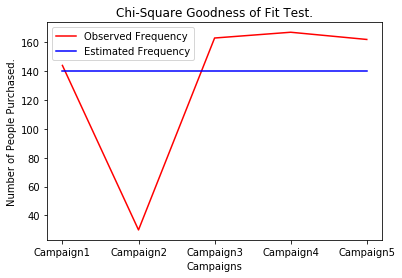

In [3]:
c1 = data['AcceptedCmp1'].sum()
c2 = data['AcceptedCmp2'].sum()
c3 = data['AcceptedCmp3'].sum()
c4 = data['AcceptedCmp4'].sum()
c5 = data['AcceptedCmp5'].sum()

obs_frq = [c1,c2,c3,c4,c5]
est_frq = [140,140,140,140,140]

# Calculating degrees of freedom
n1= len(obs_frq)
n2= len(est_frq)
df = n1-1

#Hypothesis
H0 = "The campaign is Successful. It is reached to expected customers."
H1 = "The campaign is not Successful. It isn't reached to expected customers."

from scipy.stats import chisquare
chisq,p = chisquare(obs_frq,est_frq)

print("P-value is = ",p)
print("Chi-Square value is = ",chisq)
print("Degrees of Freedom DF = ",df)
if(p>0.05):
    print(H0)
else:
    print(H1)
        
import matplotlib.pyplot as plt
x = ["Campaign1","Campaign2","Campaign3","Campaign4","Campaign5"]
plt.plot(x,obs_frq, color='r', label = 'Observed Frequency')
plt.plot(x,est_frq, color='b', label = 'Estimated Frequency')
plt.xlabel("Campaigns")
plt.ylabel("Number of People Purchased.")
plt.title("Chi-Square Goodness of Fit Test.")
plt.legend()
plt.show()


# Chi Square Contingency Table -- Test of Independence

In [22]:
H0 = " The Amount spent on differnet products is Independent of Marital Status."
H1 = "The Amount spent on differnet products is Dependent of Marital Status."

L1 =["Single","Married"]
n = len(L1)
for x in range (n):
    df = data.loc[data["Marital_Status"]==L1[x]]
    wine = df["MntWines"].mean()
    fruits = df['MntFruits'].mean()
    meat = df['MntMeatProducts'].mean()
    fish = df['MntFishProducts'].mean()
    sweet = df['MntSweetProducts'].mean()
    gold = df['MntGoldProds'].mean()
    if(L1[x]=="Single"):
        singles = [wine,fruits,meat,fish,sweet,gold]
    elif(L1[x]=="Married"):
        Married = [wine,fruits,meat,fish,sweet,gold]

from scipy.stats import chi2_contingency
obs = np.array([singles, Married])
print("Observed Frequency Table is \n",obs)
g, p, dof, expctd = chi2_contingency(obs)

print("\nStatistic value is = ",g)
print("P-Value is = ",p)
print("Degrees of Freedom = ",dof)
print("\nExpected frequency Table is \n",expctd)

if(p>0.05):
    print("\n---->",H0)
else:
    print("\n---->",H1)


Observed Frequency Table is 
 [[307.4093199   27.67380353 173.3324937   38.86523929  28.20654912
   46.15365239]
 [302.11711712  25.4982675  163.38669439  36.78447678  26.44282744
   42.76645877]]

Statistic value is =  0.1735704803722132
P-Value is =  0.9993723879228041
Degrees of Freedom =  5

Expected frequency Table is 
 [[310.92662562  27.12370066 171.76442985  38.58981255  27.87729164
   45.35919762]
 [298.5998114   26.04837037 164.95475824  37.05990353  26.77208492
   43.56091354]]

---->  The Amount spent on differnet products is Independent of Marital Status.
